In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from bart_playground import Tree, Parameters
from bart_playground import Grow, Prune, Change, Swap
from bart_playground import Dataset
from bart_playground import visualize_tree 
from bart_playground import *  # Import the updated DataGenerator class

In [3]:
dgen = DataGenerator(n_samples=100, n_features=3, noise=0.1, random_seed=42)
X, y = dgen.generate(scenario="linear")
data = Dataset(X, y, X)

rng = np.random.default_rng()

In [4]:
def tearDown(filename):
    expected_filepath = f"{filename}.png"
    if os.path.exists(expected_filepath):
        os.remove(expected_filepath)

In [5]:
tree1 = Tree(data=data)

In [6]:
trees = [tree1]
params = Parameters(trees, None, data)
params.trees

[Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

# Grow

In [7]:
move = Grow(params, trees_changed=[0])
move.propose(rng)
trees = move.proposed.trees
trees

[Tree(vars=[ 2 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.12811363        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  14  86  -2  -2  -2  -2  -2])]

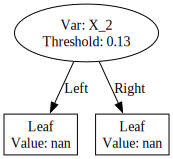

In [8]:
tree_g = move.proposed.trees[0]
filename1 = "tree_g"
visualize_tree(tree_g, filename=filename1, format="png")

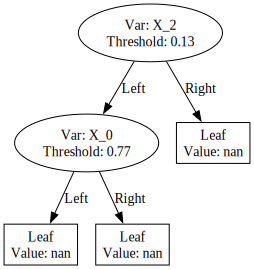

In [9]:
params = Parameters(trees, None, data)
move = Grow(params, trees_changed=[0])
move.propose(rng)
trees = move.proposed.trees
tree_gg = move.proposed.trees[0]
filename11 = "tree_gg"
visualize_tree(tree_gg, filename=filename11, format="png")

# Prune

In [10]:
params = Parameters(trees, None, data)

move = Prune(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 2 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.12811363        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  14  86  -2  -2  -2  -2  -2])]

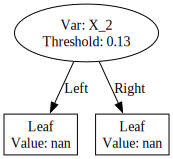

In [11]:
tree_p = move.proposed.trees[0]
filename2 = "tree_p"
visualize_tree(tree_p, filename=filename2, format="png")

# Change

In [12]:
params = Parameters(trees, None, data)

move = Change(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 2  1 -1 -1 -1 -2 -2 -2], thresholds=[0.12811363 0.09417735        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  14  86   2  12  -2  -2  -2])]

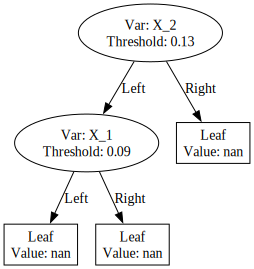

In [13]:
tree_c = move.proposed.trees[0]
filename3 = "tree_c"
visualize_tree(tree_c, filename=filename3, format="png")

# Swap

In [14]:
trees

[Tree(vars=[ 2  0 -1 -1 -1 -2 -2 -2], thresholds=[0.12811363 0.77395605        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  14  86  12   2  -2  -2  -2])]

In [15]:
params = Parameters(trees, None, data)

move = Swap(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0  2 -1 -1 -1 -2 -2 -2], thresholds=[0.77395605 0.12811363        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  80  20  12  68  -2  -2  -2])]

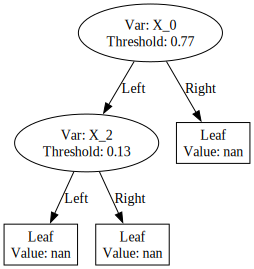

In [16]:
tree_s = move.proposed.trees[0]
filename4 = "tree_s"
visualize_tree(tree_s, filename=filename4, format="png")

In [17]:
tearDown(filename1)
tearDown(filename11)
tearDown(filename2)
tearDown(filename3)
tearDown(filename4)